<a href="https://colab.research.google.com/github/GraceOluwafemi/Msc-Project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Load the data from a CSV file
data = pd.read_csv("https://raw.githubusercontent.com/GraceOluwafemi/Msc-Project/main/diabetes_data.csv")

# Print the first few rows of the data
print (data.head())

   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0   

In [3]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
data = data.rename(columns={'Diabetes_binary': 'Diabetes_Status'})

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_Status       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [6]:
data['Diabetes_Status'] = data['Diabetes_Status'].astype(int)
print (data.head())

   Diabetes_Status  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0     1.0       1.0        1.0  40.0     1.0     0.0   
1                0     0.0       0.0        0.0  25.0     1.0     0.0   
2                0     1.0       1.0        1.0  28.0     0.0     0.0   
3                0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0   

In [7]:
data.describe()

,Diabetes_Status,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [8]:
data.isna().sum()

Diabetes_Status         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [9]:
data['Diabetes_Status'].value_counts()

0    218334
1     35346
Name: Diabetes_Status, dtype: int64

**Exploratory Data Analysis**

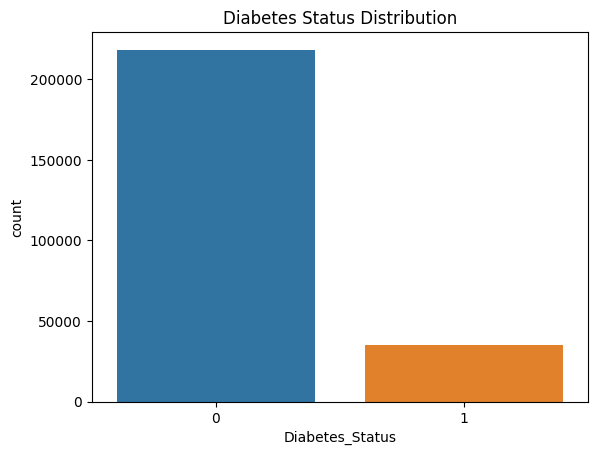

In [12]:
# Class distribution
sns.countplot(x='Diabetes_Status', data=data)
plt.title('Diabetes Status Distribution')
plt.show()

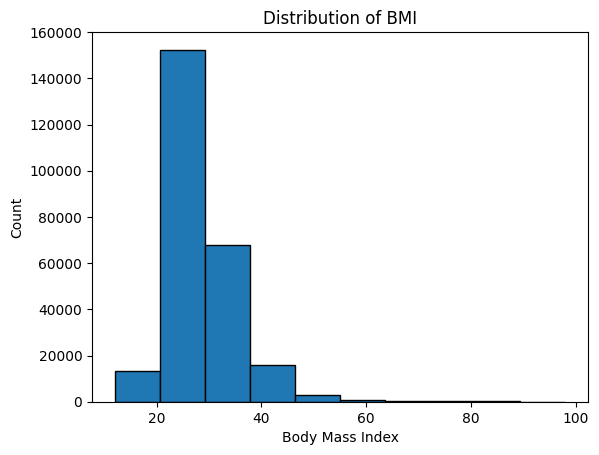

In [16]:
# Generate the histogram
plt.hist(data['BMI'], bins=10, edgecolor='black')

# Set plot labels and title
plt.xlabel('Body Mass Index')
plt.ylabel('Count')
plt.title('Distribution of BMI')

# Show the histogram
plt.show()

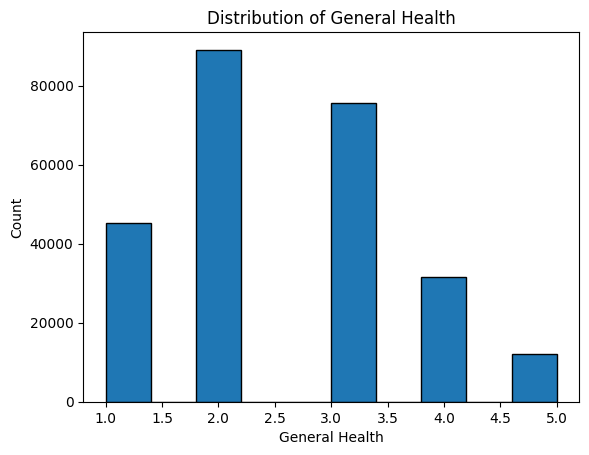

In [22]:
# Generate the histogram
plt.hist(data['GenHlth'], bins=10, edgecolor='black')

# Set plot labels and title
plt.xlabel('General Health')
plt.ylabel('Count')
plt.title('Distribution of General Health')

# Show the histogram
plt.show()

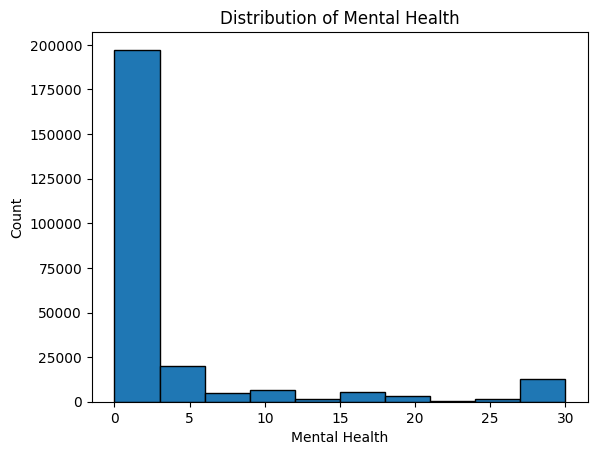

In [23]:
# Generate the histogram
plt.hist(data['MentHlth'], bins=10, edgecolor='black')

# Set plot labels and title
plt.xlabel('Mental Health')
plt.ylabel('Count')
plt.title('Distribution of Mental Health')

# Show the histogram
plt.show()

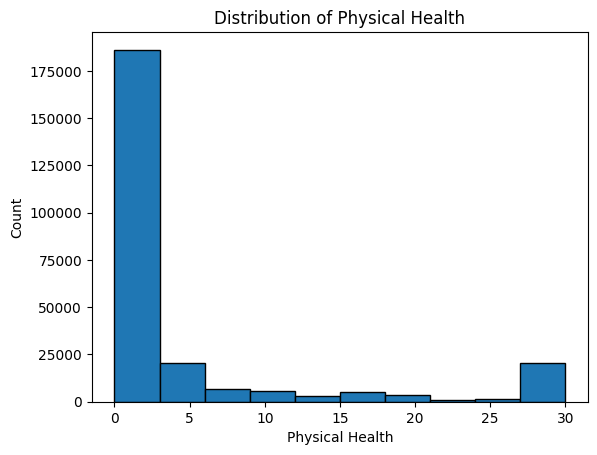

In [24]:
# Generate the histogram
plt.hist(data['PhysHlth'], bins=10, edgecolor='black')

# Set plot labels and title
plt.xlabel('Physical Health')
plt.ylabel('Count')
plt.title('Distribution of Physical Health')

# Show the histogram
plt.show()

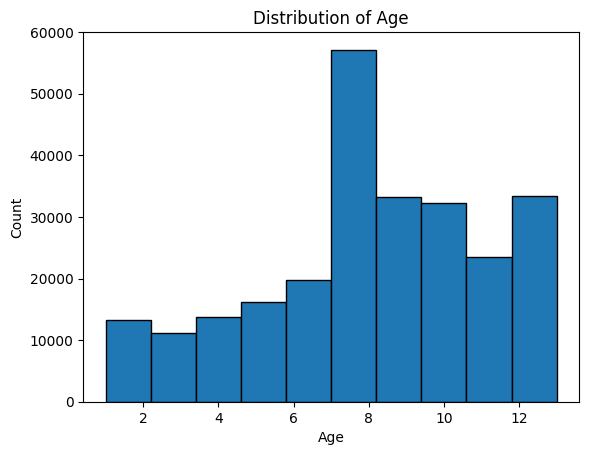

In [25]:
# Generate the histogram
plt.hist(data['Age'], bins=10, edgecolor='black')

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')

# Show the histogram
plt.show()

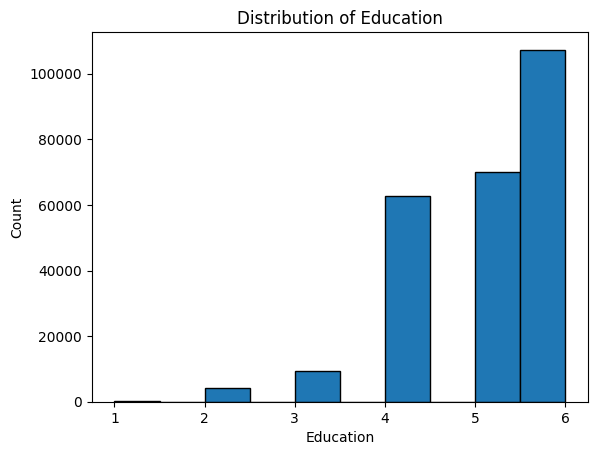

In [26]:
# Generate the histogram
plt.hist(data['Education'], bins=10, edgecolor='black')

# Set plot labels and title
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Distribution of Education')

# Show the histogram
plt.show()

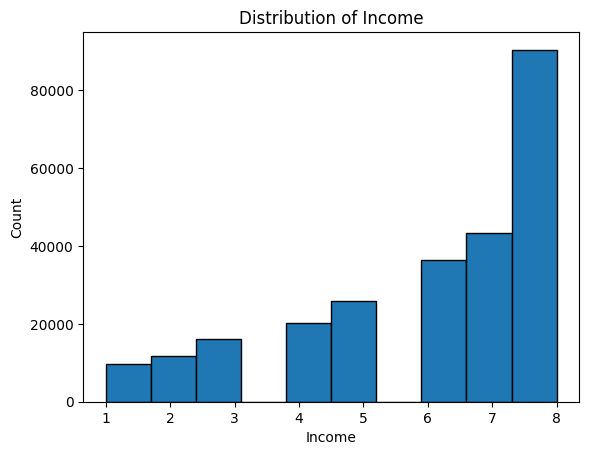

In [27]:
# Generate the histogram
plt.hist(data['Income'], bins=10, edgecolor='black')

# Set plot labels and title
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Distribution of Income')

# Show the histogram
plt.show()

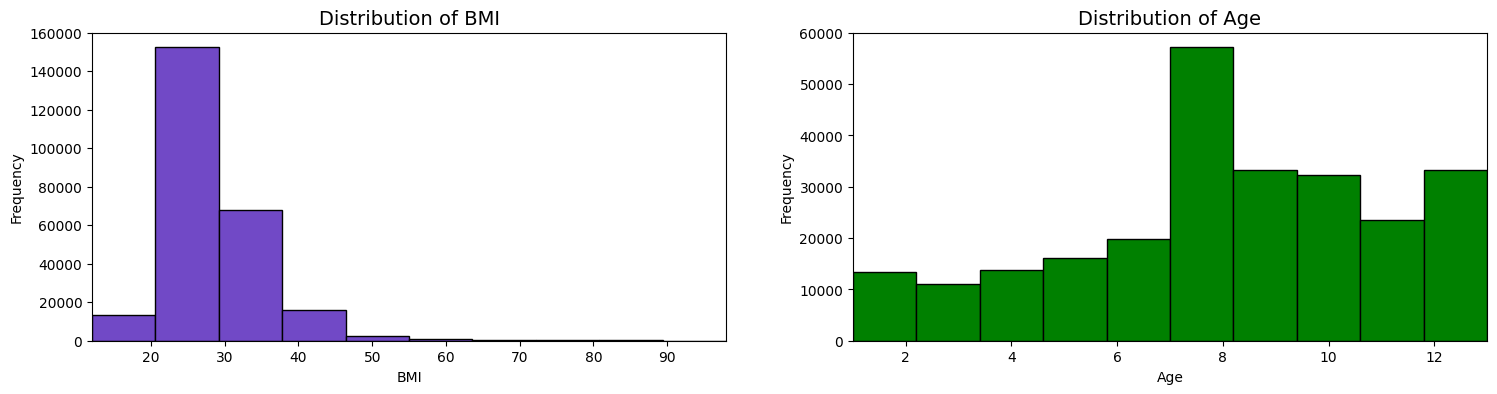

In [48]:


# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

# Extract the 'BMI' and 'Age' columns
BMI = data['BMI'].values
Age = data['Age'].values

# Plot the histogram for 'BMI'
ax[0].hist(BMI, bins=10, edgecolor='black', color='#7149C6')
ax[0].set_title('Distribution of BMI', fontsize=14)
ax[0].set_xlabel('BMI')
ax[0].set_ylabel('Frequency')
ax[0].set_xlim([min(BMI), max(BMI)])  # Set x-axis limits for BMI

# Plot the histogram for 'Age'
ax[1].hist(Age, bins=10, edgecolor='black', color='green')
ax[1].set_title('Distribution of Age', fontsize=14)
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Frequency')
ax[1].set_xlim([min(Age), max(Age)])  # Set x-axis limits for Age

# Remove gridlines
for axes in ax:
    axes.grid(False)

# Adjust spacing
#plt.tight_layout()

# Display the plot
plt.show()


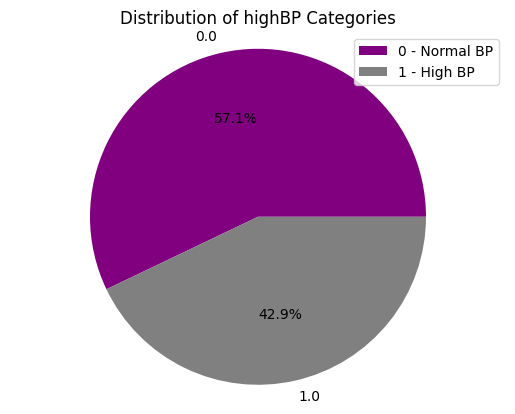

In [50]:
# Count the occurrences of each category
category_counts = data['HighBP'].value_counts()

# Create a pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=['purple', 'grey'])

# Add legend
legend_labels = ['0 - Normal BP', '1 - High BP']
plt.legend(legend_labels, loc='best')

# Set title and aspect ratio
plt.title('Distribution of highBP Categories')
plt.axis('equal')

# Display the chart
plt.show()


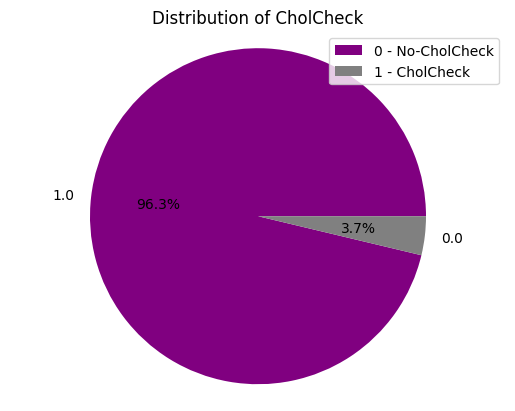

In [54]:
# Count the occurrences of each category
category_counts = data['CholCheck'].value_counts()

# Create a pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=['purple', 'grey'])

# Add legend
legend_labels = ['0 - No-CholCheck', '1 - CholCheck']
plt.legend(legend_labels, loc='best')

# Set title and aspect ratio
plt.title('Distribution of CholCheck')
plt.axis('equal')

# Display the chart
plt.show()

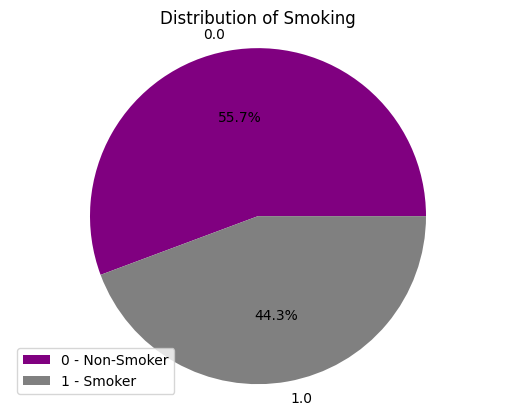

In [53]:
# Count the occurrences of each category
category_counts = data['Smoker'].value_counts()

# Create a pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=['purple', 'grey'])

# Add legend
legend_labels = ['0 - Non-Smoker', '1 - Smoker']
plt.legend(legend_labels, loc='best')

# Set title and aspect ratio
plt.title('Distribution of Smoking')
plt.axis('equal')

# Display the chart
plt.show()

**Handling Outliers**